# Overriding Default Grouping with the `group` Aesthetic

#### How Grouping Works in Lets-Plot-Kotlin

Default Grouping Behavior:
- Lets-Plot-Kotlin automatically groups data by discrete variables mapped to aesthetics like `color, shape, linetype`, etc.
- This creates separate visual elements (`lines, paths, polygons`) for each unique combination of these variables

Explicit Group Control:
- Use `group = "var"` to group only by that specific variable, overriding default grouping
- Use `group = listOf(var1, var2, ...)` to group by the interaction of multiple variables
- Use `group = emptyList<String>` to disable all grouping completely


In [1]:
%useLatestDescriptors
%use dataframe
%use lets-plot(output="js, png")

In [2]:
LetsPlot.getInfo()

Lets-Plot Kotlin API v.4.12.0. Frontend: Notebook with dynamically loaded JS. Lets-Plot JS v.4.8.1.
Outputs: Web (HTML+JS), Static PNG (hidden)

In [3]:
val df = DataFrame.readCSV("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv")
val mtcars = df.toMap()
df.head()

untitled,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.800000,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.800000,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.000000,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.000000,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.800000,1999,6,auto(l5),f,16,26,p,compact


#### 1. Highway MPG by Drive Type



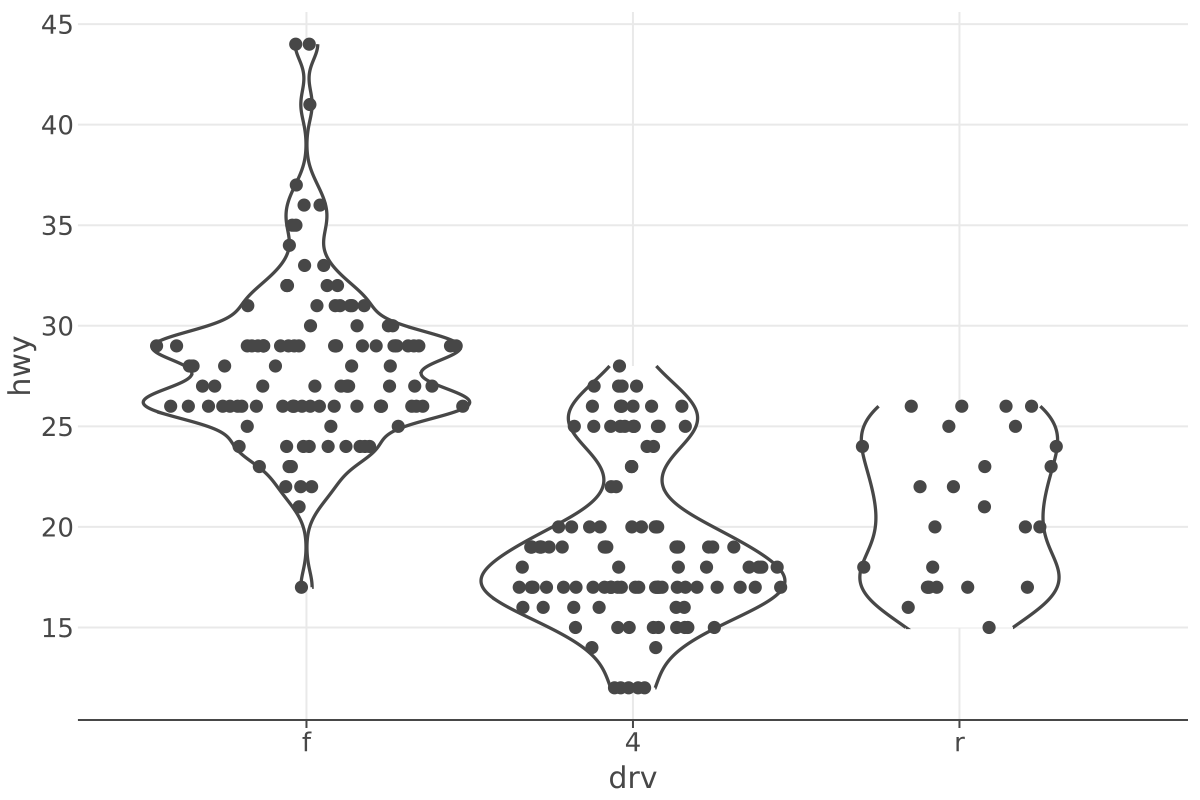

In [4]:
val seed = 21
letsPlot(mtcars) { x = "drv"; y = "hwy" } +
    geomViolin(tooltips = tooltipsNone) +
    geomSina(seed = seed)

#### 2. Add More Information - `color`


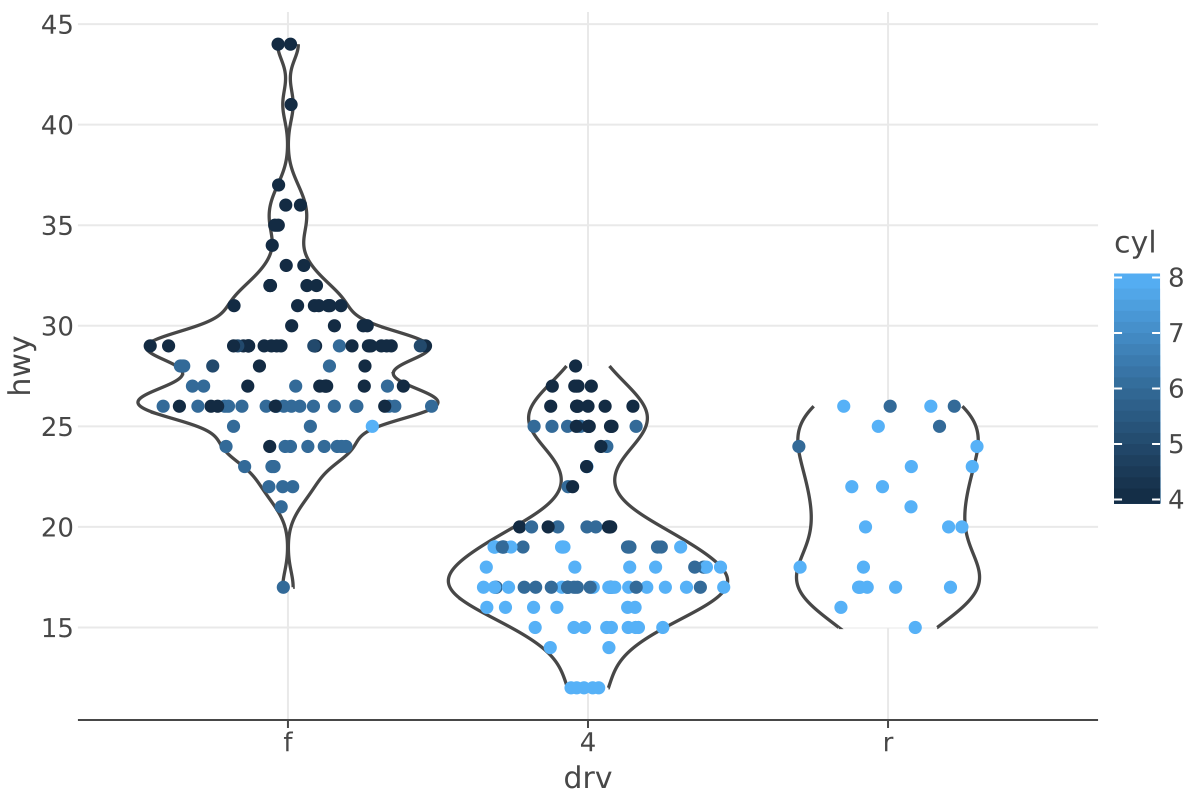

In [5]:
letsPlot(mtcars) { x = "drv"; y = "hwy" } +
    geomViolin(tooltips = tooltipsNone) +
    geomSina(seed = seed) {
        color = "cyl"
    }

#### 3. Discrete `color`: Default Grouping Creates Unwanted Separation

Let's add discrete colors by marking the `cyl` variable as discrete. 

When we map `color=asDiscrete("cyl")`, Lets-Plot automatically groups the data by the discrete color variable. \
This means:

* Automatic grouping: Each combination of `drv` (x-axis) and `cyl` (color) becomes a separate group
* Position adjustment: The `geomSina()` uses "dodge" positioning by default, which separates overlapping groups horizontally
* Result: Instead of one sina plot per drive type, we get 4 separate sina plots (one for each cylinder count) within each drive type category



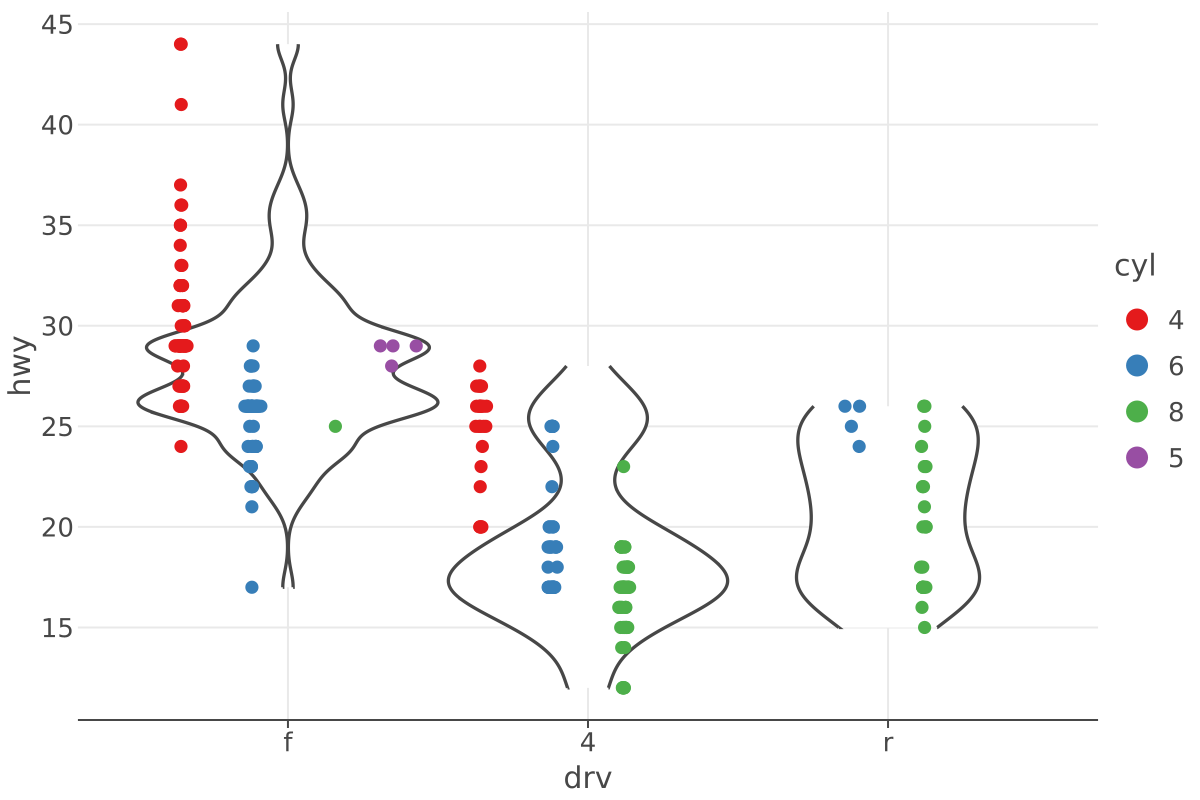

In [6]:
letsPlot(mtcars) { x = "drv"; y = "hwy" } +
    geomViolin(tooltips = tooltipsNone) +
    geomSina(seed = seed) {
        color = asDiscrete("cyl")
    }

#### 4. Fix with Explicit Grouping by Drive Type


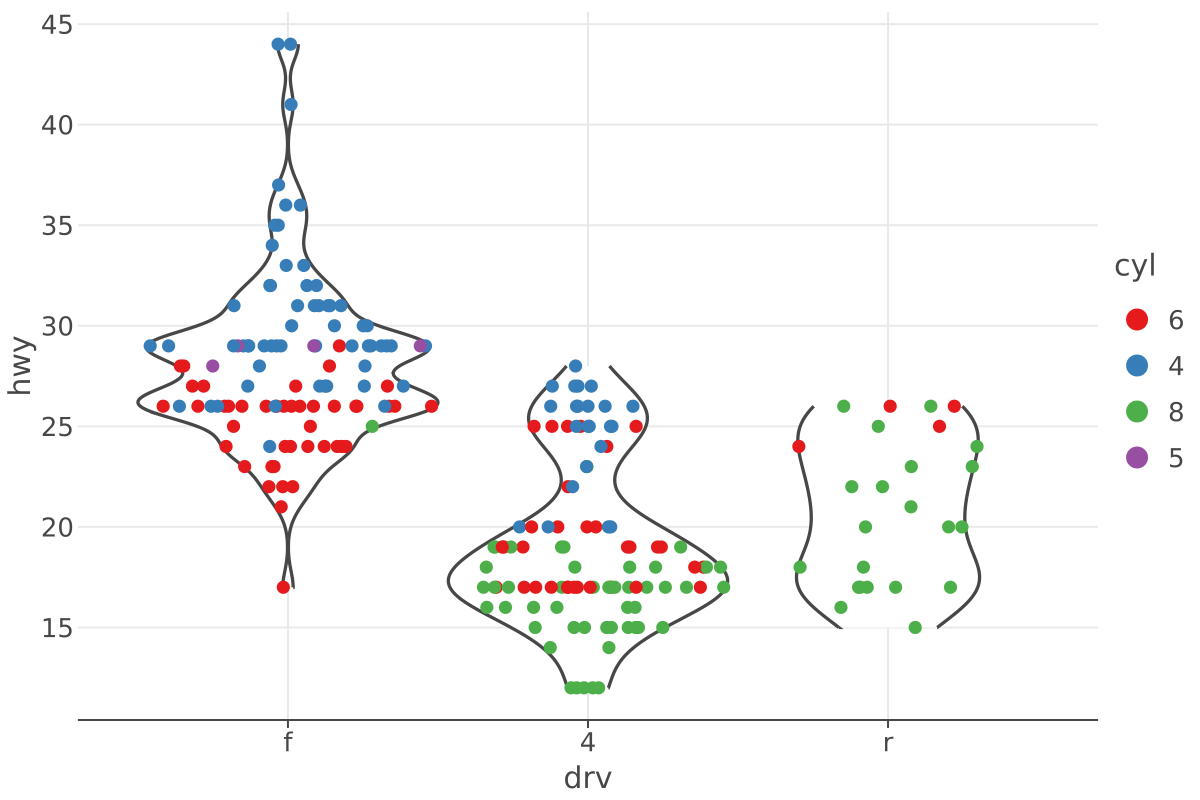

In [7]:
letsPlot(mtcars) { x = "drv"; y = "hwy" } +
    geomViolin(tooltips = tooltipsNone) +
    geomSina(seed = seed) {
        color = asDiscrete("cyl")
        
        group = "drv"      // <-- group only by drive type (ignoring the color variable for grouping)
    }


#### 5. Cleaner Fix: Disable All Grouping


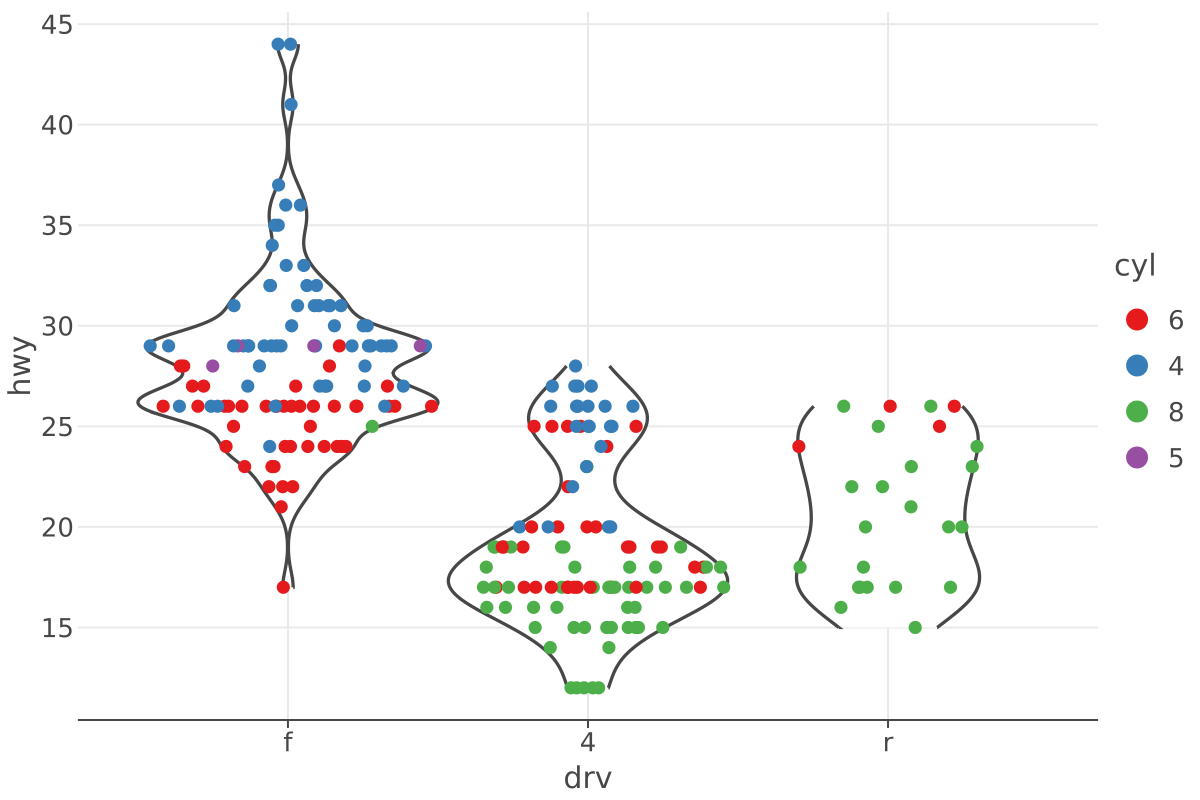

In [8]:
letsPlot(mtcars) { x = "drv"; y = "hwy" } +
    geomViolin(tooltips = tooltipsNone) +
    geomSina(seed = seed) {
        color = asDiscrete("cyl")
        
        group = emptyList<String>()     // <-- disable all grouping entirely
    }